<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/pexels-brandon-montrone-1179229.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by Kaique Rocha on Pexels</figcaption>
</div>

# Machine Learning 2

**Applied Programming - Summer term 2023 - FOM Hochschule für Oekonomie und Management - Cologne**

**Lecture 08 - May 19, 2023**

*Dennis Gluesenkamp*

## Table of contents
* [Dataset recap](#datarecap)
* [Regression](#regression)
    * [Linear regression](#regression_linear)
    * [Lasso](#regression_lasso)
    * [Random forest regressor](#regression_rf)
* [Clustering](#clustering)
    * [kMeans](#clustering_kmeans)
    * [Alternative](#clustering_alternative)

## Dataset recap<a class="anchor" id="datarecap"></a>

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

%matplotlib inline

np.random.seed(42)

In [2]:
# Artificial classification problem:
X_c, y_c = make_classification(n_samples            = 1000,
                               n_features           = 10,
                               n_redundant          = 2,
                               n_informative        = 5,
                               n_classes            = 3,
                               n_clusters_per_class = 3,
                               flip_y               = 0.05,
                               shift                = None,
                               random_state         = 42)

# Artificial regression problem:
X_r, y_r = make_regression(n_samples     = 1000,
                           n_features    = 10,
                           n_informative = 5,
                           noise         = 0.05,
                           random_state  = 42)

# Scikit-learn toy dataset for classification:
X_b, y_b = load_breast_cancer(return_X_y = True)

# Scikit-learn toy dataset for regression:
X_d, y_d = load_diabetes(return_X_y = True)

# Kaggle dataset for regression:
# Medical Cost Personal Datasets - Insurance Forecast by using Linear Regression
# https://www.kaggle.com/mirichoi0218/insurance
df_i = pd.read_csv('dat/insurance.csv')

# Preprocessing
df_i_enc = pd.get_dummies(df_i, drop_first = True)

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c,
                                                            test_size = 0.25,
                                                            random_state = 42)

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r,
                                                            test_size = 0.25,
                                                            random_state = 42)

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b,
                                                            test_size = 0.3,
                                                            random_state = 42)

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d,
                                                            test_size = 0.3,
                                                            random_state = 42)

df_i_train, df_i_test = train_test_split(df_i_enc,
                                         test_size = 0.05,
                                         random_state = 42)

st_scaler = StandardScaler()
df_i_train_scaled = pd.DataFrame(st_scaler.fit_transform(df_i_train),
                                 columns = df_i_train.columns)
df_i_test_scaled  = pd.DataFrame(st_scaler.transform(df_i_test),
                                 columns = df_i_test.columns)

## Regression<a class="anchor" id="regression"></a>
In this second part we deal with regression. This is about the prediction of continuous values in contrast to classification with discrete groups. It follows directly that the target must be a numerical expression. An example of a regression problem is the prediction of prices.

### Linear regression<a class="anchor" id="regression_linear"></a>
The classic and simplest regression approach is linear regression. This is the representation of the target variable as a linear combination of the independent variables according to the following mathematical form.
\begin{equation*}
y\left(c,x\right) = c_0 + c_1 x_1 + \dots + c_n x_n
\end{equation*}
Here, $c = \left(c_0, c_1, \dots, c_n\right)$ is coefficient vector. The model adjusts the coefficients to minimize the sum of squares of real and approximated targets, which corresponds to the mathematical minimization problem
\begin{equation*}
\min_{c} \| Xc - Y \|^2.
\end{equation*}

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Artificial regression problem
reg.fit(X_r_train, y_r_train)

LinearRegression()

In [4]:
# Calculate the coefficient of determination for test dataset
reg.score(X_r_test, y_r_test)

0.99999950690563

In [5]:
print(reg.coef_)
print(reg.intercept_)

[ 5.82890289e+01 -1.99961207e-03  6.03616892e-04  3.21259368e+01
  7.17867466e+00  1.61745631e-03  1.03011650e+01 -8.22508554e-04
 -2.57251364e-03  9.42859646e+00]
-0.0015324967650616195


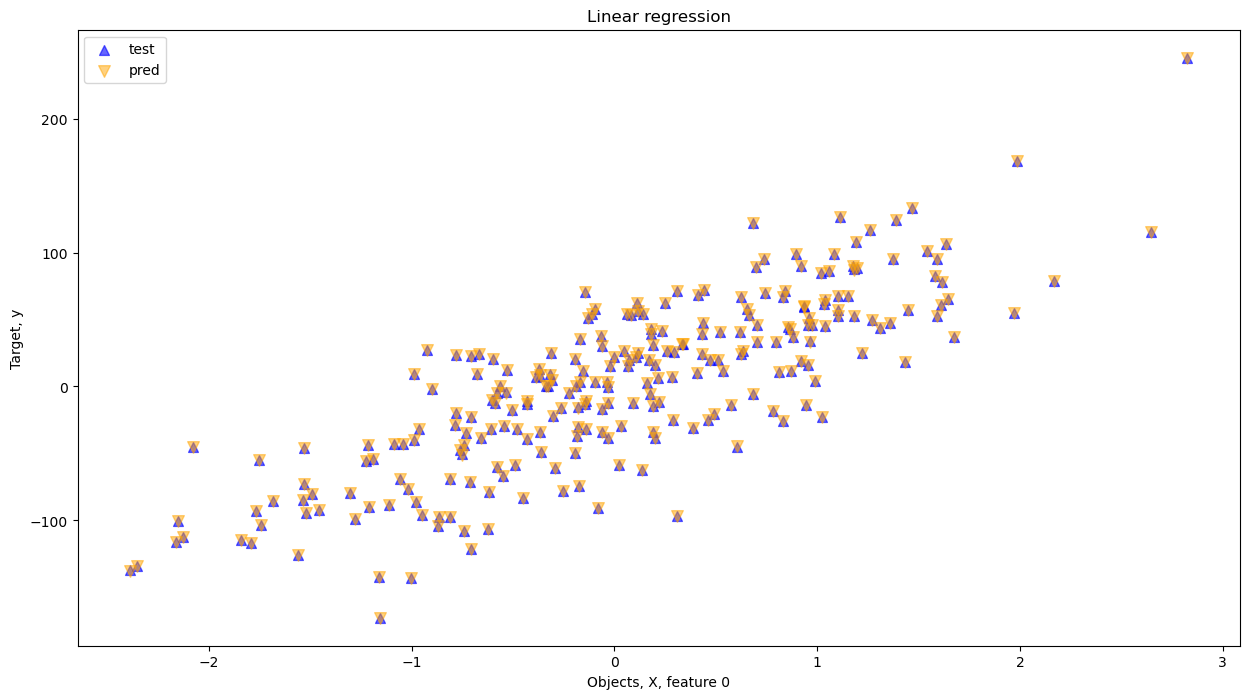

In [6]:
# Index of feature
i = 0
plt.figure(figsize = (15,8))
plt.scatter(X_r_test[:, i], y_r_test,
            s = 50, marker = '^', color = 'blue', label = 'test', alpha = 0.6)
plt.scatter(X_r_test[:, i], reg.predict(X_r_test),
            s = 70, marker = 'v', color = 'orange', label = 'pred', alpha = 0.5)
plt.xlabel('Objects, X, feature ' + str(i))
plt.ylabel("Target, y")
plt.title("Linear regression")
plt.legend()
plt.draw()

In [7]:
# Diabetes dataset
reg.fit(X_d_train, y_d_train)
reg.score(X_d_test, y_d_test)

0.4772897164322617

In [8]:
print(reg.coef_)
print(reg.intercept_)

[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
151.00821291456543


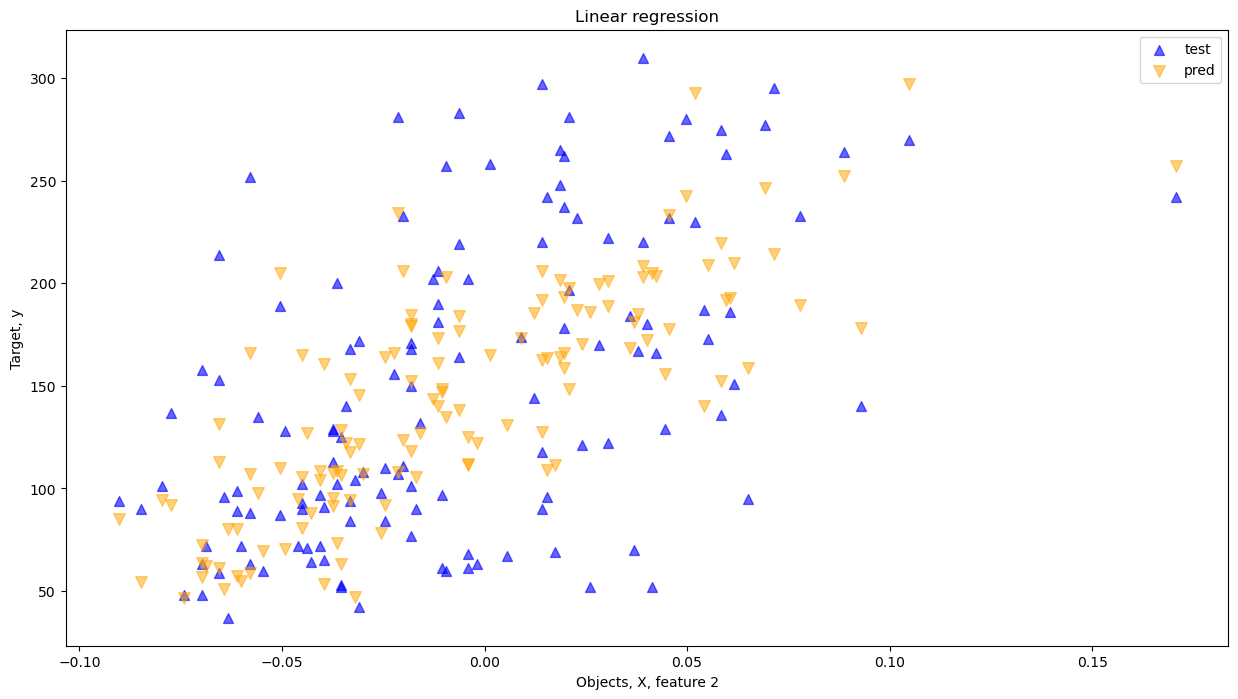

In [9]:
# Index of variable
i = 2
plt.figure(figsize = (15,8))
plt.scatter(X_d_test[:, i], y_d_test,
            s = 50, marker = '^', color = 'blue', label = 'test', alpha = 0.6)
plt.scatter(X_d_test[:, i], reg.predict(X_d_test),
            s = 70, marker = 'v', color = 'orange', label = 'pred', alpha = 0.5)
plt.xlabel('Objects, X, feature ' + str(i))
plt.ylabel('Target, y')
plt.title('Linear regression')
plt.legend()
plt.draw()

### Random forest regressor<a class="anchor" id="regression_rf"></a>
We have already learned about Random Forests as a classification algorithm. However, they can also be used for regression problems.

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf     = RandomForestRegressor(random_state = 42)
params = {'n_estimators': [50, 100, 200],
          #'criterion':    ['squared_error', 'friedman_mse', 'poisson'],
          'max_depth':    [2, 4, 6, 8]}
k      = 3

reg = GridSearchCV(rf, params, cv = k)
reg.fit(X_d_train, y_d_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [18]:
reg.score(X_d_test, y_d_test)

0.4957329330350224

In [20]:
pd.DataFrame(reg.cv_results_).sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.430699,0.015787,0.018884,0.001280,friedman_mse,4,200,"{'criterion': 'friedman_mse', 'max_depth': 4, ...",0.351560,0.506901,0.391997,0.416819,0.065802,1
5,0.450279,0.016831,0.023532,0.005132,squared_error,4,200,"{'criterion': 'squared_error', 'max_depth': 4,...",0.351560,0.506901,0.391997,0.416819,0.065802,1
20,0.488873,0.018066,0.019764,0.001894,friedman_mse,6,200,"{'criterion': 'friedman_mse', 'max_depth': 6, ...",0.346788,0.505441,0.386199,0.412809,0.067448,3
8,0.494724,0.005261,0.024111,0.003432,squared_error,6,200,"{'criterion': 'squared_error', 'max_depth': 6,...",0.346788,0.505441,0.386199,0.412809,0.067448,3
4,0.216604,0.006236,0.013962,0.005996,squared_error,4,100,"{'criterion': 'squared_error', 'max_depth': 4,...",0.350110,0.495686,0.382163,0.409320,0.062457,5
16,0.213416,0.004556,0.013500,0.007487,friedman_mse,4,100,"{'criterion': 'friedman_mse', 'max_depth': 4, ...",0.350110,0.495686,0.382163,0.409320,0.062457,5
2,0.403296,0.005108,0.024272,0.006098,squared_error,2,200,"{'criterion': 'squared_error', 'max_depth': 2,...",0.360734,0.473543,0.389925,0.408067,0.047807,7
14,0.396270,0.003153,0.021153,0.004682,friedman_mse,2,200,"{'criterion': 'friedman_mse', 'max_depth': 2, ...",0.360734,0.473543,0.389925,0.408067,0.047807,7
1,0.722674,0.267948,0.025712,0.020716,squared_error,2,100,"{'criterion': 'squared_error', 'max_depth': 2,...",0.361480,0.467587,0.391503,0.406857,0.044658,9
13,0.203471,0.004481,0.014172,0.004499,friedman_mse,2,100,"{'criterion': 'friedman_mse', 'max_depth': 2, ...",0.361480,0.467587,0.391503,0.406857,0.044658,9


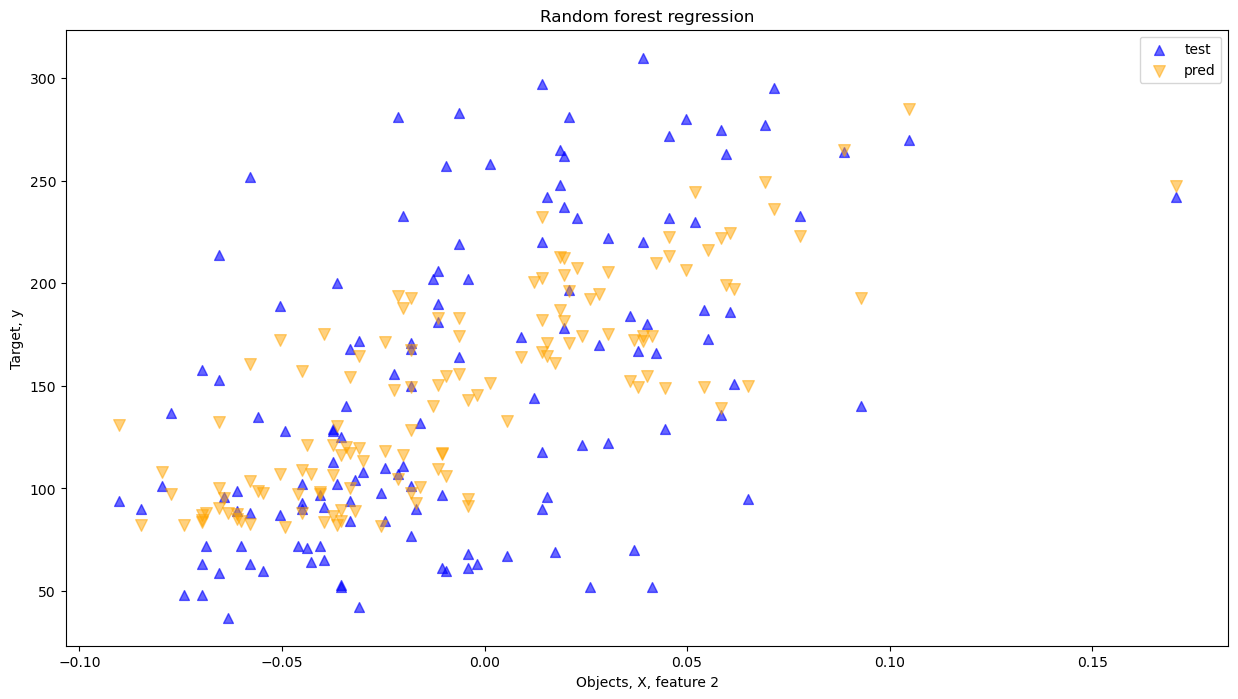

In [19]:
# Index of variable
i = 2
plt.figure(figsize = (15,8))
plt.scatter(X_d_test[:, i], y_d_test,
            s = 50, marker = '^', color = 'blue', label = 'test', alpha = 0.6)
plt.scatter(X_d_test[:, i], reg.predict(X_d_test),
            s = 70, marker = 'v', color = 'orange', label = 'pred', alpha = 0.5)
plt.xlabel('Objects, X, feature ' + str(i))
plt.ylabel('Target, y')
plt.title('Random forest regression')
plt.legend()
plt.draw()

#### Exercises
Train one random forest regressor model and another one of your choice for the insurance dataset.

In [27]:
rf_ins     = RandomForestRegressor(random_state = 42)
params = {'n_estimators': [25, 50, 100, 200],
          'criterion':    ['friedman_mse'],
          'max_depth':    [2, 4, 6, 8, 10]}
k      = 3

reg_ins = GridSearchCV(rf_ins, params, cv = k)
reg_ins.fit(df_i_train_scaled.drop('charges', axis = 1), df_i_train_scaled['charges'])


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [25, 50, 100, 200]})

In [28]:
reg_ins.score(df_i_test_scaled.drop('charges', axis = 1), df_i_test_scaled['charges'])

0.8716382711288363

In [29]:
pd.DataFrame(reg_ins.cv_results_).sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.141651,0.018352,0.009554,0.001131,friedman_mse,4,50,"{'criterion': 'friedman_mse', 'max_depth': 4, ...",0.853696,0.880656,0.826160,0.853504,0.022248,1
4,0.081880,0.019221,0.012758,0.010007,friedman_mse,4,25,"{'criterion': 'friedman_mse', 'max_depth': 4, ...",0.852090,0.881001,0.826662,0.853251,0.022199,2
7,0.526222,0.045506,0.029664,0.005046,friedman_mse,4,200,"{'criterion': 'friedman_mse', 'max_depth': 4, ...",0.852221,0.879340,0.826887,0.852816,0.021418,3
6,0.328678,0.102329,0.018709,0.006791,friedman_mse,4,100,"{'criterion': 'friedman_mse', 'max_depth': 4, ...",0.852511,0.879499,0.826434,0.852815,0.021665,4
11,0.564885,0.018473,0.026520,0.001054,friedman_mse,6,200,"{'criterion': 'friedman_mse', 'max_depth': 6, ...",0.855033,0.872332,0.823379,0.850248,0.020269,5
9,0.206955,0.097738,0.011828,0.004745,friedman_mse,6,50,"{'criterion': 'friedman_mse', 'max_depth': 6, ...",0.854424,0.872909,0.822125,0.849819,0.020987,6
10,0.363045,0.115537,0.019587,0.005184,friedman_mse,6,100,"{'criterion': 'friedman_mse', 'max_depth': 6, ...",0.854849,0.871241,0.821816,0.849302,0.020555,7
8,0.074368,0.001704,0.005091,0.000401,friedman_mse,6,25,"{'criterion': 'friedman_mse', 'max_depth': 6, ...",0.852185,0.871427,0.821291,0.848301,0.020651,8
13,0.162210,0.006554,0.012374,0.003087,friedman_mse,8,50,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",0.849495,0.860272,0.813634,0.841134,0.019936,9
15,0.694838,0.053522,0.029922,0.000289,friedman_mse,8,200,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",0.850272,0.858053,0.812893,0.840406,0.019712,10


## Clustering<a class="anchor" id="clustering"></a>
We will conclude the two lectures on machine learning with a method of unsupervised learning, namely clustering. This refers to the discovery of structures in the data set that exhibit similarities between objects. The objects found in this way are assigned to groups called clusters. Clustering thus aims at new findings that were not previously available. The algorithm formed in this way can also be applied to previously unknown data in order to make an appropriate assignment.

### kMeans<a class="anchor" id="clustering_kmeans"></a>
Apply the k-means algorithm to arbitrary high-dimensional data. The method first chooses $k$ centers as the starting points. Then, an assignment of the objects in the data set to these centers is performed. This is done based on the distance of the objects to the centers. Subsequently, the cluster centers are recalculated based on the points. The assignment and recalculation is then repeated until there is no change.

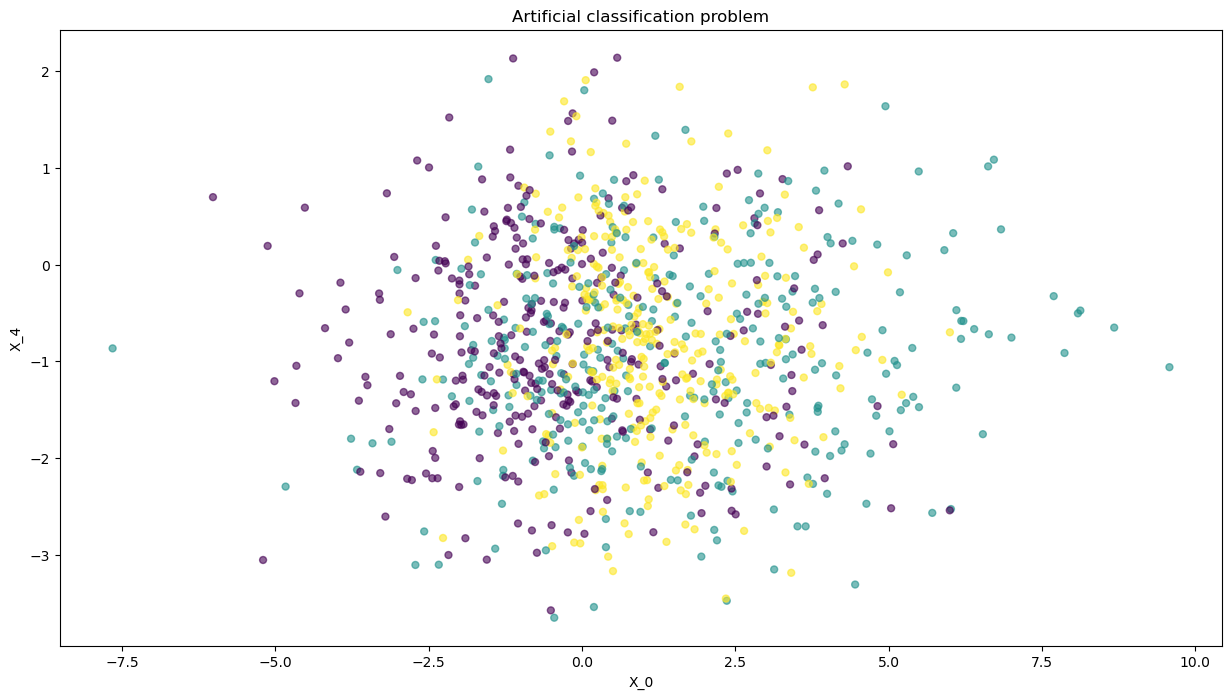

In [30]:
plt.figure(figsize = (15, 8))
plt.scatter(X_c[:, 0], X_c[:, 4], s = 25, c = y_c, alpha = 0.6)
plt.xlabel('X_0')
plt.ylabel('X_4')
plt.title('Artificial classification problem')
plt.draw()

In [31]:
from sklearn.cluster import KMeans
y_c_pred = KMeans(n_clusters = 3, n_init = 100, max_iter = 1000, random_state = 42).fit_predict(X_c)

In [32]:
df_c = pd.concat([pd.DataFrame(X_c), pd.DataFrame(y_c), pd.DataFrame(y_c_pred)], axis = 1)
df_c.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'y', 'y_pred']
df_c.sample(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,y,y_pred
521,0.838312,-0.683373,-0.539634,0.061437,-1.685973,-1.538815,-1.020704,-0.704525,-1.272034,-2.543436,2,0
737,3.814769,1.943726,-0.743245,1.971120,0.765928,0.682011,-0.948186,-2.263904,0.537334,0.470680,1,1
740,-2.091814,0.126654,0.558342,0.290806,-1.465690,-0.728211,1.687304,0.373620,-0.715997,0.950814,0,2
660,-1.259101,-0.095008,0.528524,0.340215,-0.780365,-0.448834,1.382272,-0.430402,0.408721,0.697985,1,2
411,-0.589176,-0.390692,0.305719,1.329758,-2.955167,-0.796572,-0.656377,-0.029314,-0.963237,1.010841,1,2


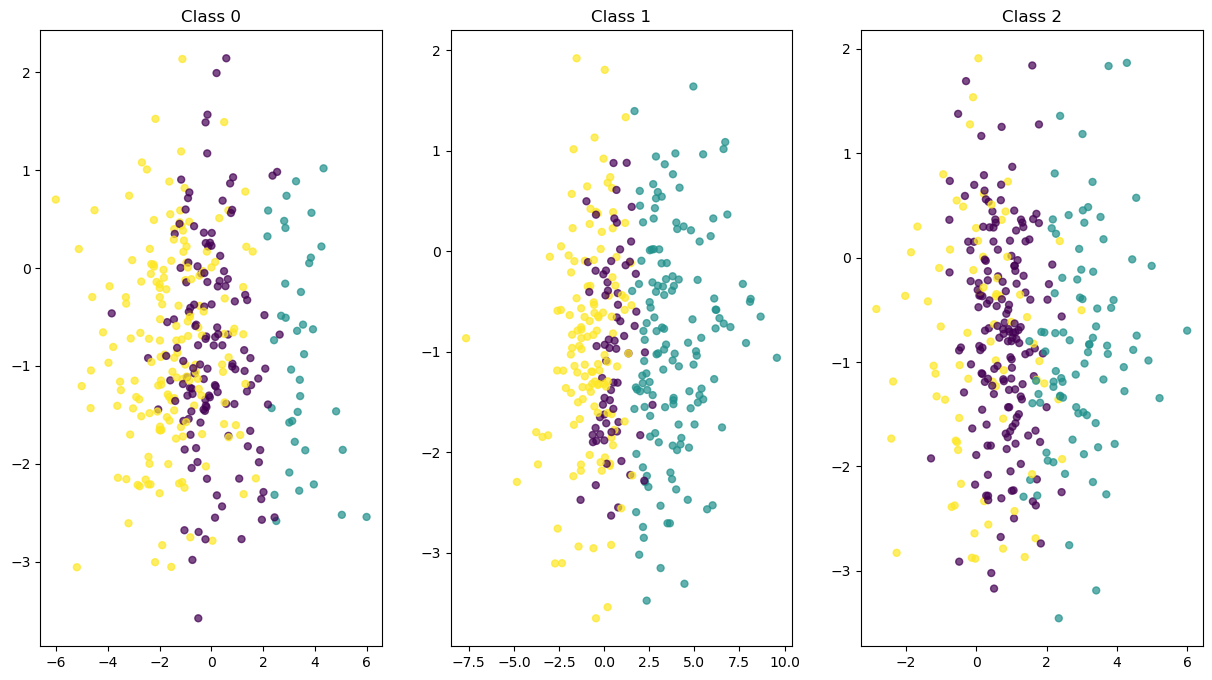

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 8))
ax[0].scatter(df_c[df_c['y'] == 0]['X0'], df_c[df_c['y'] == 0]['X4'],
              s = 25, c = df_c[df_c['y'] == 0]['y_pred'], alpha = 0.7)
ax[0].set_title('Class 0')
ax[1].scatter(df_c[df_c['y'] == 1]['X0'], df_c[df_c['y'] == 1]['X4'],
              s = 25, c = df_c[df_c['y'] == 1]['y_pred'], alpha = 0.7)
ax[1].set_title('Class 1')
ax[2].scatter(df_c[df_c['y'] == 2]['X0'], df_c[df_c['y'] == 2]['X4'],
              s = 25, c = df_c[df_c['y'] == 2]['y_pred'], alpha = 0.7)
ax[2].set_title('Class 2')
plt.draw()

### Alternative<a class="anchor" id="clustering_alternative"></a>

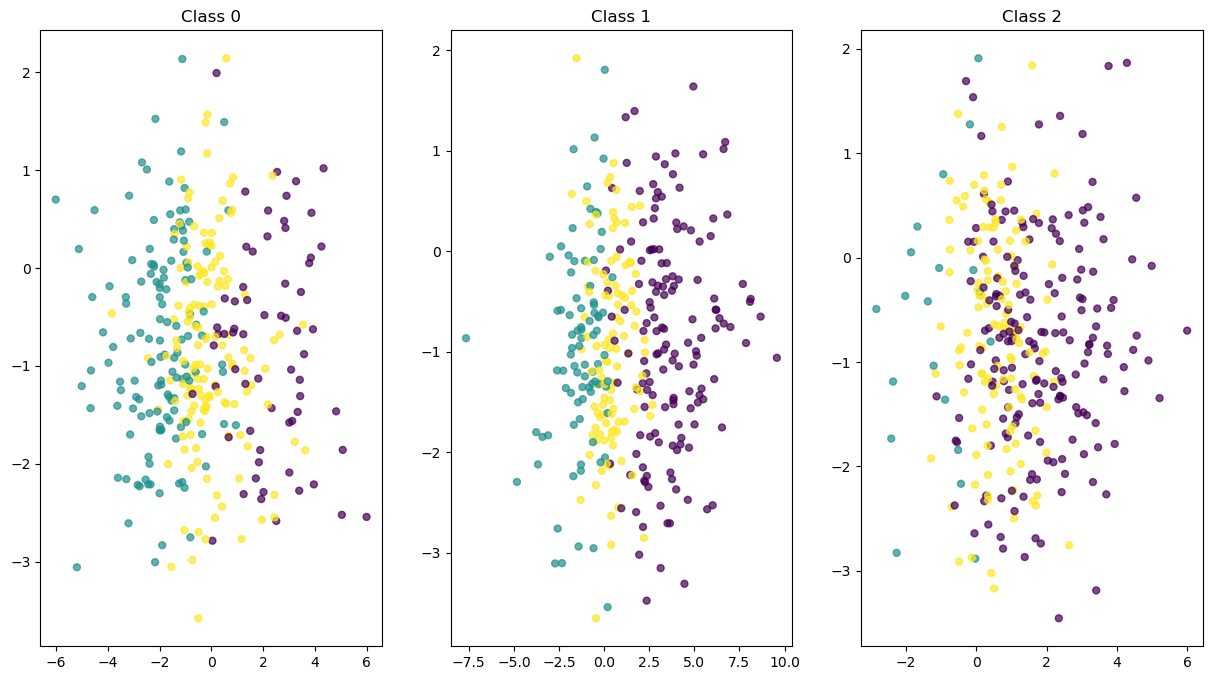

In [34]:
from sklearn.cluster import AgglomerativeClustering

y_c_pred = AgglomerativeClustering(n_clusters = 3).fit_predict(X_c)

df_c = pd.concat([pd.DataFrame(X_c), pd.DataFrame(y_c), pd.DataFrame(y_c_pred)], axis = 1)
df_c.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'y', 'y_pred']

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 8))
ax[0].scatter(df_c[df_c['y'] == 0]['X0'], df_c[df_c['y'] == 0]['X4'],
              s = 25, c = df_c[df_c['y'] == 0]['y_pred'], alpha = 0.7)
ax[0].set_title('Class 0')
ax[1].scatter(df_c[df_c['y'] == 1]['X0'], df_c[df_c['y'] == 1]['X4'],
              s = 25, c = df_c[df_c['y'] == 1]['y_pred'], alpha = 0.7)
ax[1].set_title('Class 1')
ax[2].scatter(df_c[df_c['y'] == 2]['X0'], df_c[df_c['y'] == 2]['X4'],
              s = 25, c = df_c[df_c['y'] == 2]['y_pred'], alpha = 0.7)
ax[2].set_title('Class 2')
plt.draw()

<hr>